### Overview

Throughout this notebook will be presented the implementation of the expy module, more specifically the ABTesting class for design, analysis and drawing decisions for A/B Tests. 

In [1]:
# Importing the class for designining, analysing and simulating A/B tests

import expy

- Initializing the class

In [2]:
# Main parameters: bcr = 20% and mde = 5% (default: alpha = 5%, power = 80%, absolute_variation = True, and two_tailed = True)

ab_experiment = expy.ABTesting(.20, .05)

- Evan Miller's Sample Size Calculator

In [3]:
# Setting the minimum required sample size for conducting the A/B Experiment 

min_sample_size = ab_experiment.evan_miller_sample_size()
min_sample_size

1030

- A/B Testing Simulation

In [4]:
# Simulating an A/B experiment for returning the conversion proportion in both groups

exp_results_summary = ab_experiment.simulate_experiment_results(
    p_ctrl = .15, n_ctrl_inc = 28, n_trmt_inc = 35, lift = .03, random_state = 7
).round(2)
exp_results_summary

group,control,treatment
result,0.15,0.22
sample size,1058.00,1065.00


In [5]:
# Displaying the results dataset from a simulated experiment

exp_results_raw = ab_experiment.simulate_experiment_results(
    .15, 28, 37, lift = .03, summary_table = False, random_state = 7
)
exp_results_raw

,group,result
669,treatment,0
478,treatment,0
172,control,1
73,control,0
109,treatment,0
...,...,...
1016,control,1
1048,treatment,0
969,control,0
945,treatment,0


- Interpreting the Experiment Results

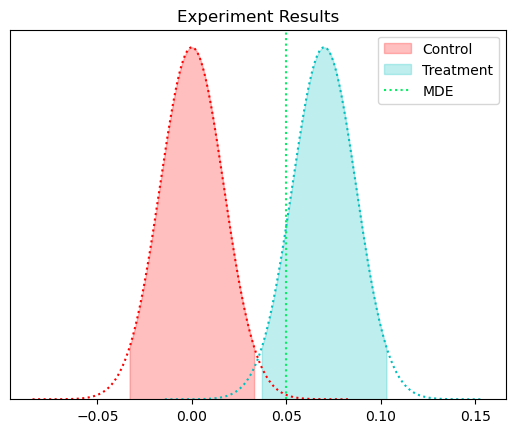



Notes:
[1] There might not have enough Power to draw any conclusion about the experiment results. Thus, it is recommended to conduct some additional tests.


In [6]:
# For a lift (3%) lower than the desired effect size (5%)

ab_experiment.get_experiment_results(exp_results_summary.at['sample size', 'control'], exp_results_summary.at['result', 'control'], 
                                  exp_results_summary.at['sample size', 'treatment'], exp_results_summary.at['result', 'treatment'])

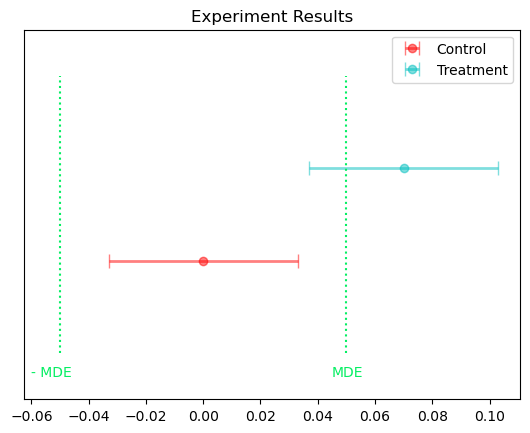



Notes:
[1] There might not have enough Power to draw any conclusion about the experiment results. Thus, it is recommended to conduct some additional tests.


In [7]:
# Additionally, we may also plot the Error Bar (Confidence Intervals)

ab_experiment.get_experiment_results(exp_results_summary.at['sample size', 'control'], exp_results_summary.at['result', 'control'], 
                                  exp_results_summary.at['sample size', 'treatment'], exp_results_summary.at['result', 'treatment'],
                                  plot_type = 'Confidence Intervals')

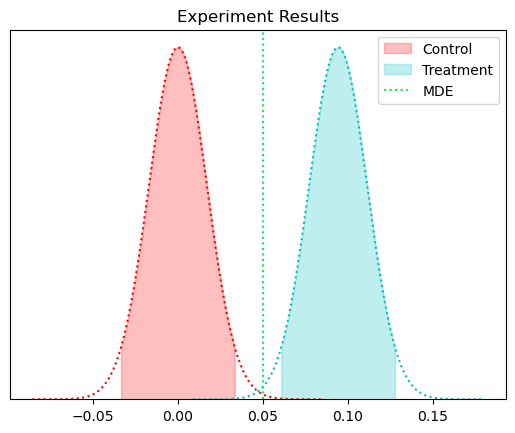



Notes:
[1] Given that 0.06 (the lower bound for the estimated difference) ≥ 0.05 (the practical significance), it is recommended to launch the version B!


In [8]:
# For a lift (0.5%) greater than the desired effect size (5%)

exp_results_summary_grt = ab_experiment.simulate_experiment_results(
    p_ctrl = .15, n_ctrl_inc = 28, n_trmt_inc = 37, lift = .05, random_state = 7
)
ab_experiment.get_experiment_results(exp_results_summary_grt.at['sample size', 'control'], exp_results_summary_grt.at['result', 'control'], 
                                  exp_results_summary_grt.at['sample size', 'treatment'], exp_results_summary_grt.at['result', 'treatment'])

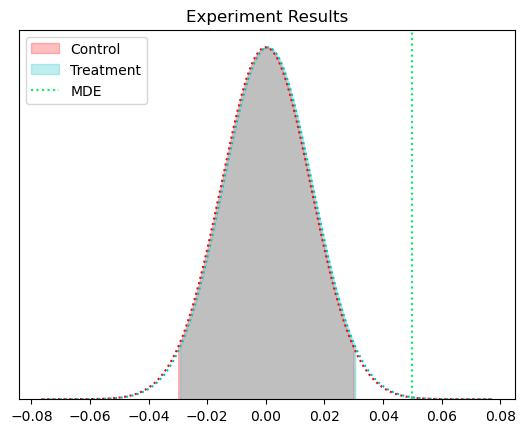



Notes:
[1] Since  0.03 (the upper bound for the estimated difference) ≤ 0.05 (the practical significance), it is then recommended to keep the current version!


In [9]:
# For a decrease equal to the desired effect size (lift = - 5%) 

exp_results_summary_dec = ab_experiment.simulate_experiment_results(
    p_ctrl = .15, n_ctrl_inc = 28, n_trmt_inc = 37, lift = -.05, random_state = 7
)
ab_experiment.get_experiment_results(exp_results_summary_dec.at['sample size', 'control'], exp_results_summary_dec.at['result', 'control'], 
                                  exp_results_summary_dec.at['sample size', 'treatment'], exp_results_summary_dec.at['result', 'treatment'], 
                                  plot_type = 'KDE')

                  ________  ________   _______   ______ 
                 /_  __/ / / / ____/  / ____/ | / / __ \
                  / / / /_/ / __/    / __/ /  |/ / / / /
                 / / / __  / /___   / /___/ /|  / /_/ / 
                /_/ /_/ /_/_____/  /_____/_/ |_/_____/  